pandas and numpy for data manipulation

matplotlib and seaborn for visualization

sklearn for the machine learning model




In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.ticker as mtick

In [9]:
df = pd.read_csv('/content/House Price Prediction Dataset.csv')
print(df.head())

   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  


# Exploratory Data Analysis (EDA)

Visualization of relationships, helping to understand correlations between features like Size and Price.

In [12]:
print(df.isnull().sum())

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


<ipython-input-21-d7a5973fcae8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_avg_price.index, y=location_avg_price.values, palette='Set3')


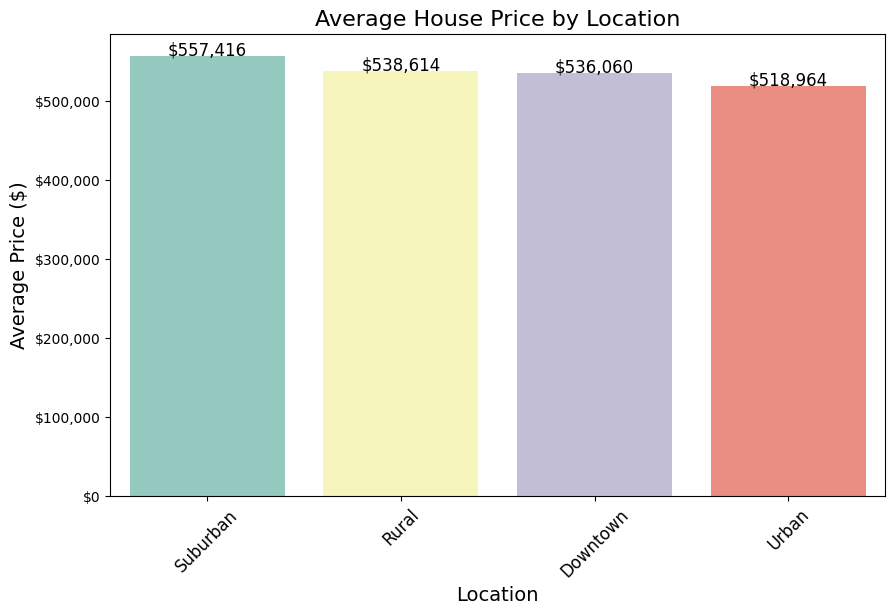

In [21]:
# Bar plot of average price per location with price annotations
plt.figure(figsize=(10, 6))
location_avg_price = df.groupby('Location')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=location_avg_price.index, y=location_avg_price.values, palette='Set3')

# Add the title and labels
plt.title('Average House Price by Location', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Add price values on top of each bar
for index, value in enumerate(location_avg_price.values):
    plt.text(index, value + 1000, f'${value:,.0f}', ha='center', fontsize=12, color='black')

plt.show()


<ipython-input-26-e6f469656660>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_per_bin = df.groupby('Area Bin')['Price'].mean().reset_index()
<ipython-input-26-e6f469656660>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Area Bin', y='Price', data=avg_price_per_bin, palette='Set2')


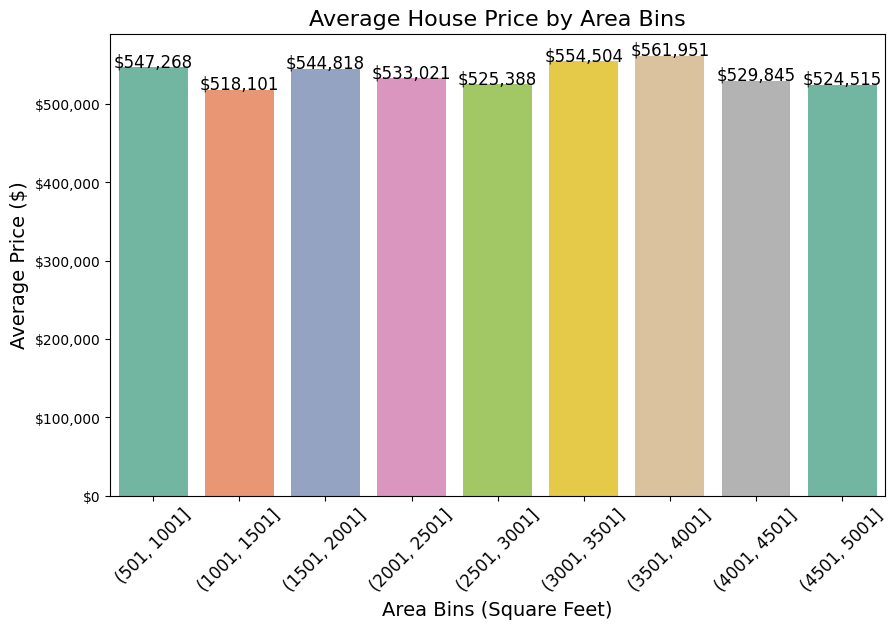

In [26]:
# Create bins for Area
bins = np.arange(df['Area'].min(), df['Area'].max() + 500, 500)
df['Area Bin'] = pd.cut(df['Area'], bins)

# Calculate average price per bin
avg_price_per_bin = df.groupby('Area Bin')['Price'].mean().reset_index()

# Bar plot of average price per area bin
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Area Bin', y='Price', data=avg_price_per_bin, palette='Set2')

# Add price values on top of each bar
for index, value in enumerate(avg_price_per_bin['Price']):
    plt.text(index, value + 1000, f'${value:,.0f}', ha='center', fontsize=12, color='black')

# Add title and labels
plt.title('Average House Price by Area Bins', fontsize=16)
plt.xlabel('Area Bins (Square Feet)', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))  # Format y-axis as currency
plt.show()


# Data Preprocessing


Handling categorical data (Location) by encoding it into numerical columns, making it suitable for the regression model. Also splitting the dataset into training and testing sets.

In [27]:
# OneHotEncode the 'Location' column
encoder = OneHotEncoder(drop='first')
encoded_location = encoder.fit_transform(df[['Location']]).toarray()

# Create a DataFrame for the encoded data
location_df = pd.DataFrame(encoded_location, columns=encoder.get_feature_names_out(['Location']))

# Concatenate the encoded 'Location' with the original data
df = pd.concat([df.drop('Location', axis=1), location_df], axis=1)

# Separate features (X) and target (y)
X = df.drop('Price', axis=1)
y = df['Price']

In [30]:
df.dropna(subset=['Area', 'Price'], inplace=True)

df['Area'].fillna(df['Area'].mean(), inplace=True)
df['Price'].fillna(df['Price'].mean(), inplace=True)

df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

print(df.isnull().sum())


Id                   0
Area                 0
Bedrooms             0
Bathrooms            0
Floors               0
YearBuilt            0
Condition            0
Garage               0
Price                0
Area Bin             2
Location_Rural       0
Location_Suburban    0
Location_Urban       0
dtype: int64


<ipython-input-30-88a7bd9ddaf3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Area'].fillna(df['Area'].mean(), inplace=True)
<ipython-input-30-88a7bd9ddaf3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

# Train the Linear Regression Model

LinearRegression() is used to fit a model on the training data.

The model predicts house prices on the test set.

In [31]:
from sklearn.model_selection import train_test_split

X = df[['Area']]  # Features
y = df['Price']   # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Coefficients represent the weights assigned to each feature (independent variable) in  regression model. In the context of a simple linear regression (with one feature like Area), the coefficient indicates how much the target variable (Price) is expected to change for a one-unit increase in the feature (in this case, the area of the house).


The intercept is the value of the target variable (Price) when all the feature values are zero. It represents the starting point of the regression line on the y-axis.

In [32]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [-0.18386104]
Intercept: 536693.6793940249


In [33]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Print predictions and actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())


      Actual      Predicted
1860  514764  536577.295354
353   694256  535984.711216
1333   66375  536399.869449
905   650243  536380.196317
1289  223285  536222.259682


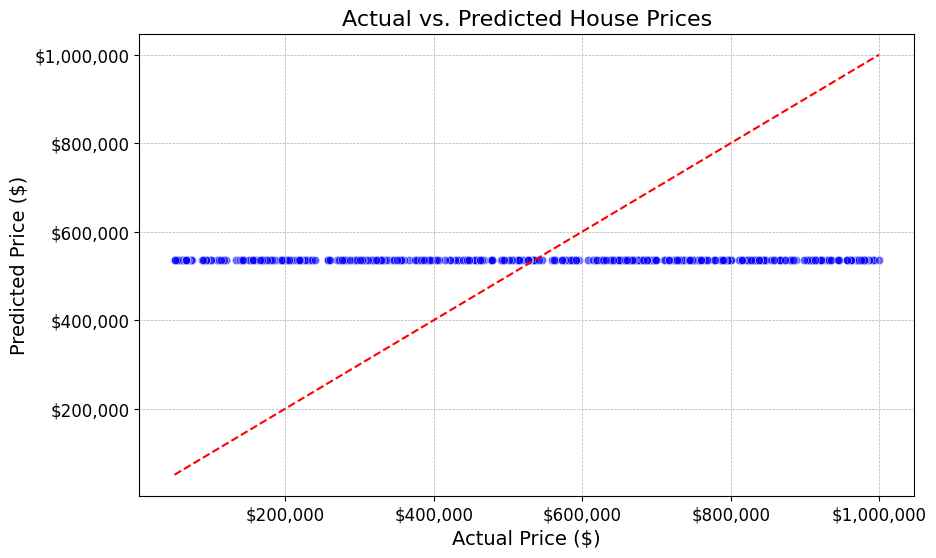

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison, color='blue', alpha=0.6)
plt.plot([comparison['Actual'].min(), comparison['Actual'].max()],
         [comparison['Actual'].min(), comparison['Actual'].max()],
         color='red', linestyle='--')  # Line for perfect prediction

plt.title('Actual vs. Predicted House Prices', fontsize=16)
plt.xlabel('Actual Price ($)', fontsize=14)
plt.ylabel('Predicted Price ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))  # Format y-axis as currency
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))  # Format x-axis as currency
plt.show()


In [34]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)


Mean Squared Error: 77856127383.1798
R-squared: -0.0007365003351658128


MSE : MSE is the average of the squares of the errors, which are the differences between the actual values and the predicted values. It quantifies how close the predicted values are to the actual values.

R-squared (R²): R-squared, also known as the coefficient of determination, measures the proportion of variance in the dependent variable (the target) that can be explained by the independent variables (features) in the model. It provides an indication of how well the independent variables explain the variability of the dependent variable